# Support Vector Machine (SVM) Classifier
A SVM classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. 

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.codershood.info%2Fwp-content%2Fuploads%2F2019%2F01%2FSupport-Vector-Machine-Machine-learning-algorithm-with-example-and-code.jpg&f=1&nofb=1"/>

SVMs find a line (or hyperplane in dimensions greater than 2) in between different classes of data such that the distance on either side of that line or hyperplane to the next-closest data points is maximized.

## Support Vectors
Support vectors are the data points which are closest to the hyperplane. These points will define the separating line better by calculating margins.

## Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectorsor closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

## Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Separation Planes

1. Linear

2. Non-Linear

### Dealing with non-linear and inseparable planes
SVM uses kernel trick to transform the input space to a higher dimensional space

## SVM Kernels
1. Linear

2. Polynomial

3. Radial Basis Function

The SVM algorithm is implemented in practice using a kernel. Kernel helps us to build a more accurate classifier.

1. A linear kernel can be used as normal dot product on any two given observations. The dot product between two vectors is the sum of the multiplication of each pair of input values.

2. A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space

3. The Radial Basis Function (RBF) kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

In [68]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [70]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
cancer=datasets.load_breast_cancer()

In [72]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [73]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [74]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [75]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [76]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [77]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [78]:
cancer.feature_names.shape

(30,)

In [79]:
X=cancer.data
y=cancer.target

In [80]:
X.shape, y.shape

((569, 30), (569,))

# Standardization

In [81]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Split the data and build the model

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

In [83]:
from sklearn import svm

Accuracy:  0.9912280701754386
Precision:  0.9863013698630136
Recall:  1.0
Confusion Matrix


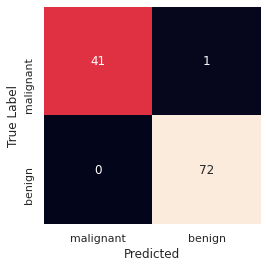

In [84]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_predict=clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# Polynomial Kernel

Accuracy:  0.9473684210526315
Precision:  0.9459459459459459
Recall:  0.9722222222222222
Confusion Matrix


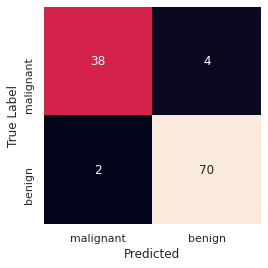

In [85]:
clf=svm.SVC(kernel='poly', degree=5, gamma=100)
clf.fit(X_train, y_train)

y_predict=clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# Sigmoid Kernel

Accuracy:  0.8947368421052632
Precision:  0.9411764705882353
Recall:  0.8888888888888888
Confusion Matrix


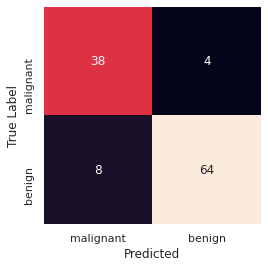

In [86]:
clf=svm.SVC(kernel='sigmoid', gamma=200, C=10)
clf.fit(X_train, y_train)

y_predict=clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

Accuracy:  0.9824561403508771
Precision:  0.972972972972973
Recall:  1.0
Confusion Matrix


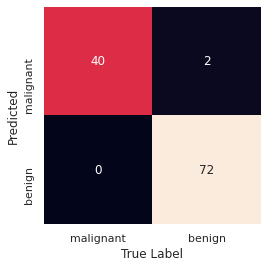

In [87]:
clf=svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_predict=clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predict))
print("Precision: ", metrics.precision_score(y_test, y_predict))
print("Recall: ", metrics.recall_score(y_test, y_predict))

print("Confusion Matrix")

mat=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted')
plt.show()